# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(
      f'df_hh_income: {df_hh_income.shape}\n'
      f'df_pct_poverty: {df_pct_poverty.shape}\n'
      f'df_pct_completed_hs: {df_pct_completed_hs.shape}\n'
      f'df_share_race_city: {df_share_race_city.shape}\n'
      f'df_fatalities: {df_fatalities.shape}'
)

df_hh_income: (29322, 3)
df_pct_poverty: (29329, 3)
df_pct_completed_hs: (29329, 3)
df_share_race_city: (29268, 7)
df_fatalities: (2535, 14)


In [5]:
print(
      f'df_hh_income: {df_hh_income.columns}\n'
      f'df_pct_poverty: {df_pct_poverty.columns}\n'
      f'df_pct_completed_hs: {df_pct_completed_hs.columns}\n'
      f'df_share_race_city: {df_share_race_city.columns}\n'
      f'df_fatalities: {df_fatalities.columns}'
)

df_hh_income: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
df_pct_poverty: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
df_pct_completed_hs: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
df_share_race_city: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
df_fatalities: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [6]:
print(
      f'df_hh_income: {df_hh_income.isna().values.any()}\n'
      f'df_pct_poverty: {df_pct_poverty.isna().values.any()}\n'
      f'df_pct_completed_hs: {df_pct_completed_hs.isna().values.any()}\n'
      f'df_share_race_city: {df_share_race_city.isna().values.any()}\n'
      f'df_fatalities: {df_fatalities.isna().values.any()}'
)

df_hh_income: True
df_pct_poverty: False
df_pct_completed_hs: False
df_share_race_city: False
df_fatalities: True


In [7]:
print(
      f'df_hh_income: {df_hh_income.duplicated().values.any()}\n'
      f'df_pct_poverty: {df_pct_poverty.duplicated().values.any()}\n'
      f'df_pct_completed_hs: {df_pct_completed_hs.duplicated().values.any()}\n'
      f'df_share_race_city: {df_share_race_city.duplicated().values.any()}\n'
      f'df_fatalities: {df_fatalities.duplicated().values.any()}'
)

df_hh_income: False
df_pct_poverty: False
df_pct_completed_hs: False
df_share_race_city: False
df_fatalities: False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [8]:
df_hh_income.loc[df_hh_income.isna().values == True]

Geographic Area                    City Median Income
29119              WY              Albany CDP           NaN
29121              WY              Alcova CDP           NaN
29123              WY    Alpine Northeast CDP           NaN
29126              WY      Antelope Hills CDP           NaN
29129              WY           Arlington CDP           NaN
29130              WY   Arrowhead Springs CDP           NaN
29132              WY       Atlantic City CDP           NaN
29133              WY              Auburn CDP           NaN
29139              WY             Bedford CDP           NaN
29140              WY       Bessemer Bend CDP           NaN
29141              WY              Beulah CDP           NaN
29142              WY            Big Horn CDP           NaN
29144              WY           Bondurant CDP           NaN
29145              WY             Boulder CDP           NaN
29152              WY           Carpenter CDP           NaN
29153              WY              Carter CDP           NaN
29156              WY          Centennial CDP           NaN
29164              WY                Cora CDP           NaN
29186              WY          Fontenelle CDP           NaN
29187              WY        Fort Bridger CDP           NaN
29191              WY            Fox Park CDP           NaN
29207              WY           Hillsdale CDP           NaN
29210              WY          Homa Hills CDP           NaN
29213              WY             Huntley CDP           NaN
29217              WY        Jeffrey City CDP           NaN
29220              WY               Kelly CDP           NaN
29225              WY      Lakeview North CDP           NaN
29226              WY         Lance Creek CDP           NaN
29230              WY      Little America CDP           NaN
29231              WY            Lonetree CDP           NaN
29232              WY       Lost Springs town           NaN
29237              WY            McKinnon CDP           NaN
29238              WY             Mammoth CDP           NaN
29242              WY        Meadow Acres CDP           NaN
29249              WY       Mountain View CDP           NaN
29254              WY              Oakley CDP           NaN
29255              WY               Opal town           NaN
29256              WY                Orin CDP           NaN
29259              WY           Owl Creek CDP           NaN
29266              WY        Powder River CDP           NaN
29282              WY           Ryan Park CDP           NaN
29288              WY              Slater CDP           NaN
29297              WY          Table Rock CDP           NaN
29300              WY       Teton Village CDP           NaN
29307              WY        Van Tassell town           NaN
29308              WY             Veteran CDP           NaN
29312              WY              Washam CDP           NaN
29313              WY     Westview Circle CDP           NaN
29315              WY             Whiting CDP           NaN
29317              WY  Woods Landing-Jelm CDP           NaN
29321              WY           Y-O Ranch CDP           NaN

In [9]:
df_hh_income.fillna(0, inplace=True)

In [10]:
df_pct_poverty.describe()

Geographic Area           City poverty_rate
count            29329          29329        29329
unique              51          24255          771
top                 PA  Franklin city            0
freq              1762             16         1464

In [11]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [12]:
for i in range(len(df_pct_poverty['poverty_rate'])):
    if df_pct_poverty['poverty_rate'][i] == '-':
        df_pct_poverty['poverty_rate'][i] = '0'

In [13]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [14]:
state_df = df_pct_poverty[['Geographic Area', 'poverty_rate']].groupby('Geographic Area').agg(lambda x: np.mean(x))

In [15]:
state_df.sort_values(by='poverty_rate', ascending=False, inplace=True)

<BarContainer object of 51 artists>

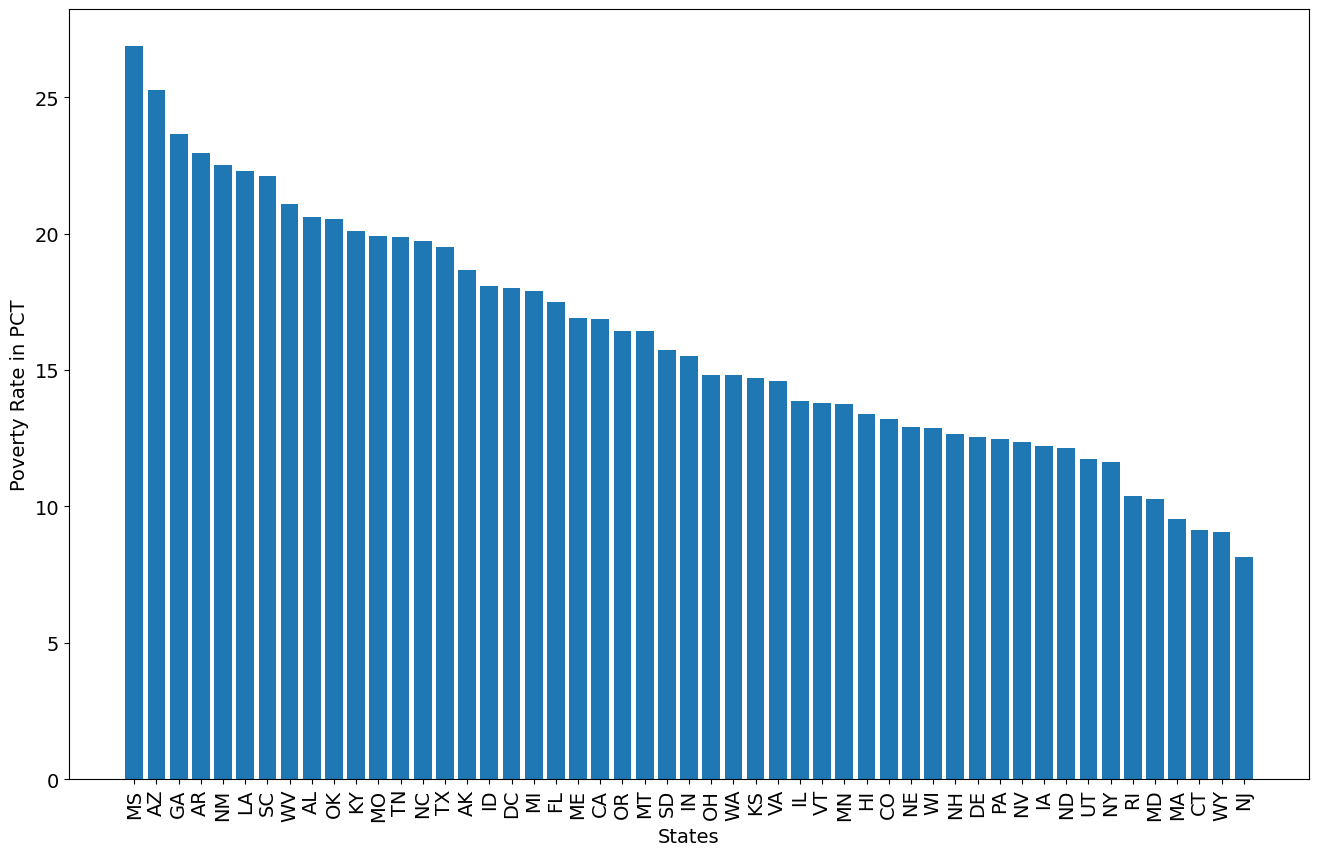

In [16]:
plt.figure(figsize=(16, 10))
plt.xlabel('States', fontsize=14)
plt.ylabel('Poverty Rate in PCT', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.bar(state_df.index, state_df['poverty_rate'])

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [17]:
for i in range(len(df_pct_completed_hs['percent_completed_hs'])):
    if df_pct_completed_hs['percent_completed_hs'][i] == '-':
        df_pct_completed_hs['percent_completed_hs'][i] = '0'

In [18]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])

In [19]:
hs_df = df_pct_completed_hs[['Geographic Area', 'percent_completed_hs']].groupby('Geographic Area').agg(lambda x: np.mean(x))

In [20]:
hs_df.sort_values(by='percent_completed_hs', ascending=True, inplace=True)

<BarContainer object of 51 artists>

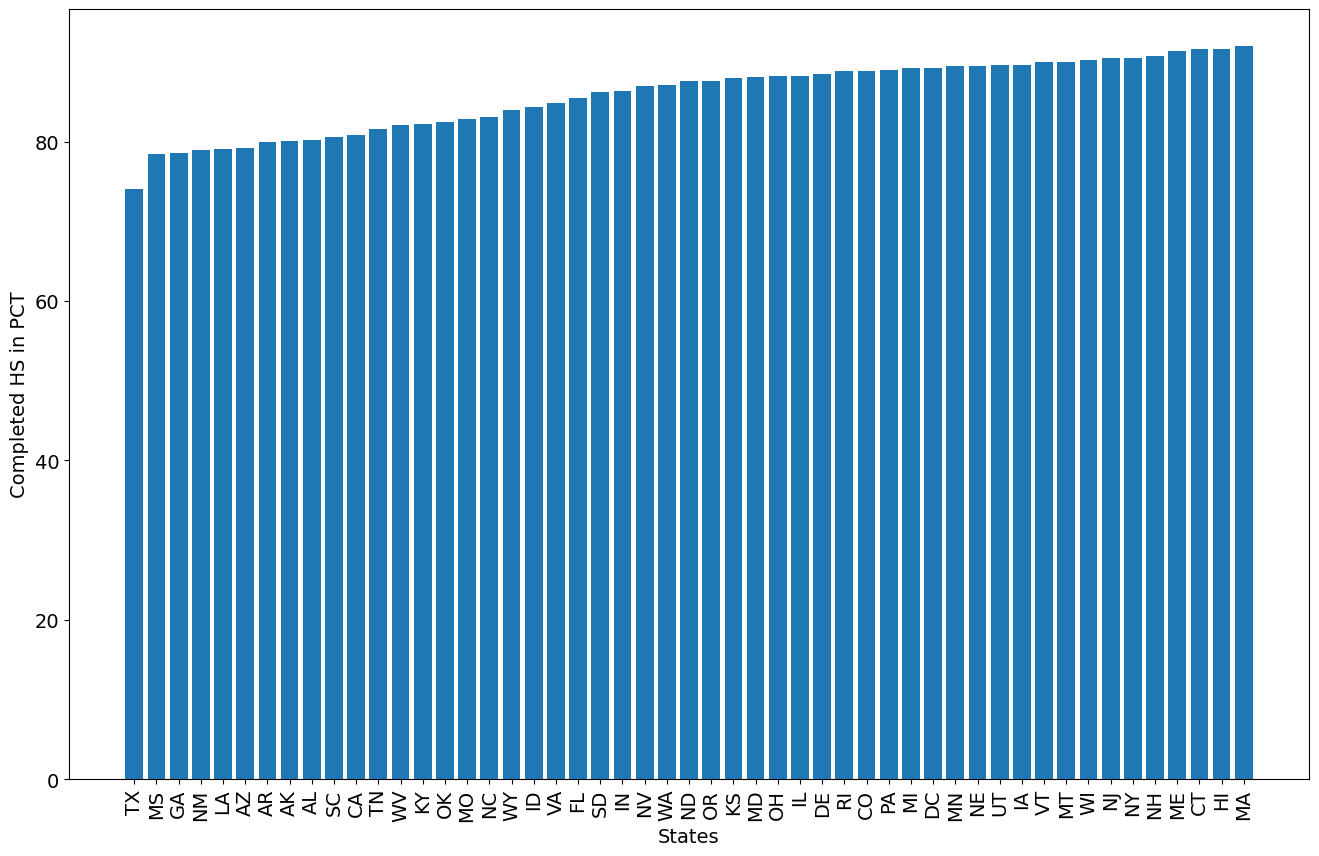

In [21]:
plt.figure(figsize=(16, 10))
plt.xlabel('States', fontsize=14)
plt.ylabel('Completed HS in PCT', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.bar(hs_df.index, hs_df['percent_completed_hs'])

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [22]:
state_df.sort_index(inplace=True)

In [23]:
hs_df.sort_index(inplace=True)

C:\Users\wsr\AppData\Local\Temp\ipykernel_17876\2374510048.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(state_df.index, rotation=90, fontsize=14)


Text(0, 0.5, 'Graduation HS in PCT')

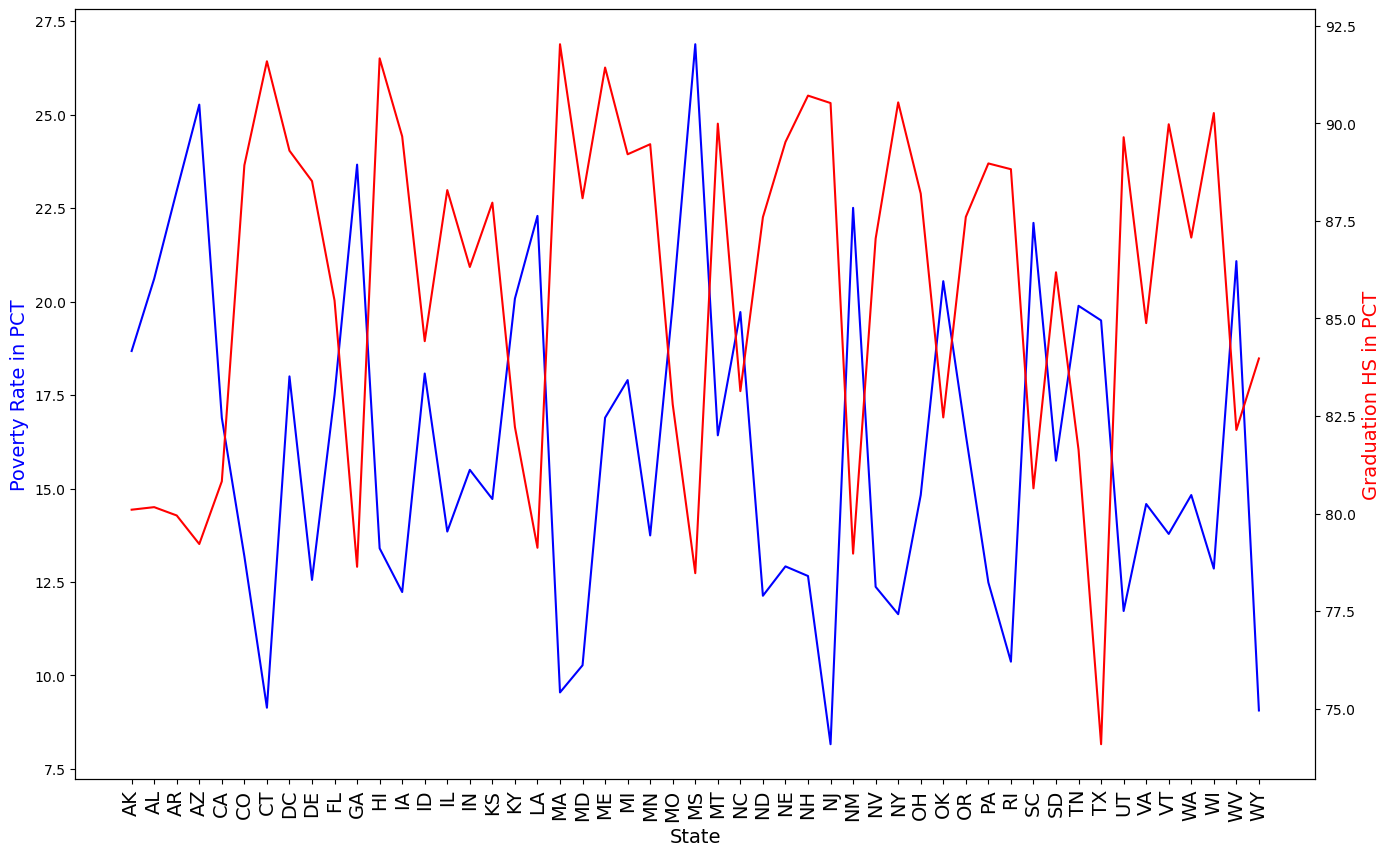

In [24]:
ax1 = plt.figure(figsize=(16, 10)).gca()
ax2 = ax1.twinx()

# Add styling
ax1.plot(state_df.index, state_df.poverty_rate, color='b')
ax2.plot(hs_df.index, hs_df.percent_completed_hs, 'r')

ax1.set_xlabel('State', fontsize=14)
ax1.set_xticklabels(state_df.index, rotation=90, fontsize=14)
ax1.set_ylabel('Poverty Rate in PCT', color='blue', fontsize=14)
ax2.set_ylabel('Graduation HS in PCT', color='red', fontsize=14)

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [25]:
state_hs_df = state_df
state_hs_df['percent_completed_hs'] = hs_df['percent_completed_hs']

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

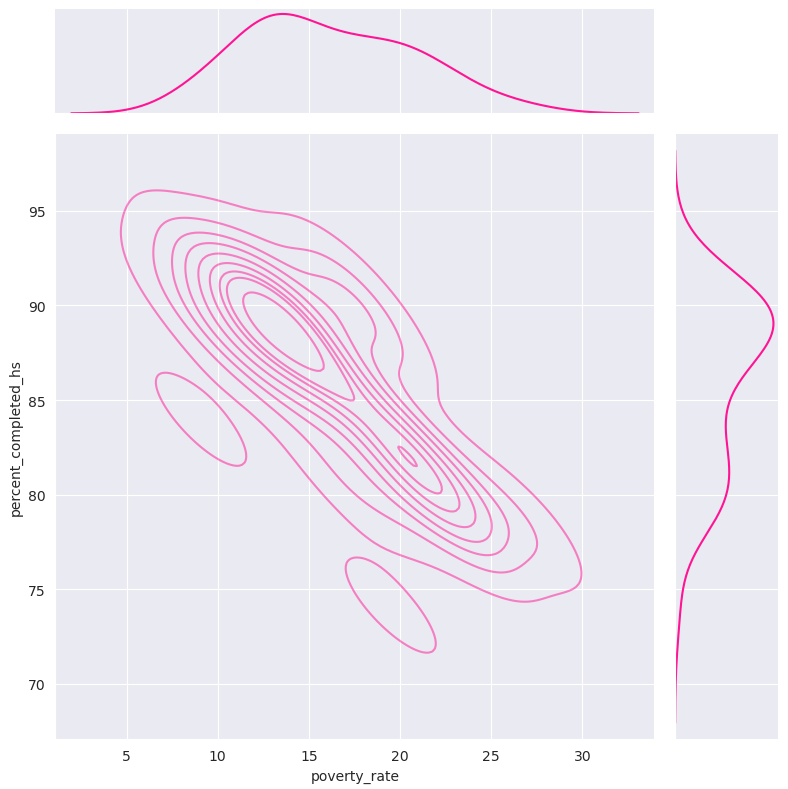

In [26]:
with sns.axes_style('darkgrid'):
    sns.jointplot(x=state_hs_df.poverty_rate,
                  y=state_hs_df.percent_completed_hs,
                  height=8,
                  kind='kde',
                  color='deeppink',
                  joint_kws={'alpha': 0.5})
    
plt.show()

<Axes: xlabel='poverty_rate', ylabel='percent_completed_hs'>

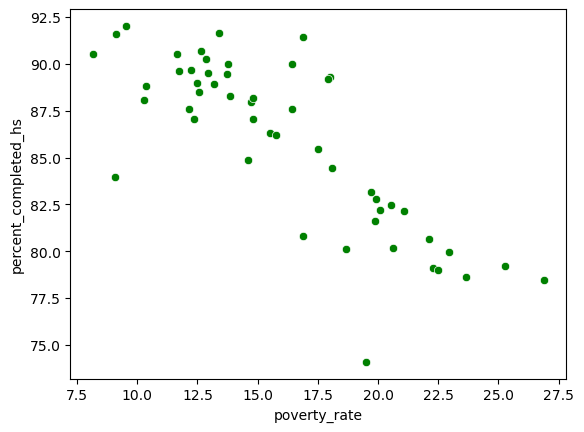

In [27]:
sns.scatterplot(data=state_hs_df, x=state_hs_df.poverty_rate, y=state_hs_df.percent_completed_hs, color='g')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<Axes: xlabel='poverty_rate', ylabel='percent_completed_hs'>

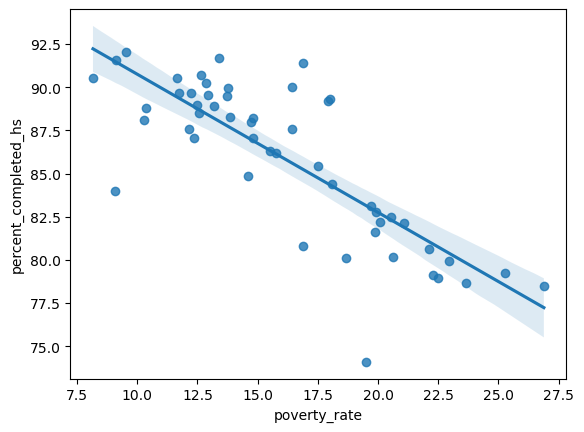

In [28]:
sns.regplot(data=state_hs_df, 
            x=state_hs_df.poverty_rate,
            y=state_hs_df.percent_completed_hs)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [29]:
df_share_race_city.head(3)

Geographic area             City share_white share_black  \
0              AL       Abanda CDP        67.2        30.2   
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
2                   0.5         0.3            2.3

In [30]:
df_share_race_city.shape

(29268, 7)

In [31]:
columns = ['share_white', 'share_black', 'share_native_american',
           'share_asian', 'share_hispanic']

mask = np.column_stack([df_share_race_city[col].str.contains('(X)', na=False) for col in columns])
new_race_df = df_share_race_city.drop(df_share_race_city.loc[mask.any(axis=1)].index)

C:\Users\wsr\AppData\Local\Temp\ipykernel_17876\1279765262.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = np.column_stack([df_share_race_city[col].str.contains('(X)', na=False) for col in columns])


In [32]:
n_mask = np.column_stack([new_race_df[col].str.contains('(X)', na=False) for col in columns])
new_race_df.loc[n_mask.any(axis=1)]

C:\Users\wsr\AppData\Local\Temp\ipykernel_17876\784226946.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  n_mask = np.column_stack([new_race_df[col].str.contains('(X)', na=False) for col in columns])


Empty DataFrame
Columns: [Geographic area, City, share_white, share_black, share_native_american, share_asian, share_hispanic]
Index: []

In [33]:
new_race_df

Geographic area                    City share_white share_black  \
0                  AL              Abanda CDP        67.2        30.2   
1                  AL          Abbeville city        54.4        41.4   
2                  AL         Adamsville city        52.3        44.9   
3                  AL            Addison town        99.1         0.1   
4                  AL              Akron town        13.2        86.5   
...               ...                     ...         ...         ...   
29263              WY  Woods Landing-Jelm CDP        95.9           0   
29264              WY            Worland city        89.9         0.3   
29265              WY             Wright town        94.5         0.1   
29266              WY              Yoder town        97.4           0   
29267              WY           Y-O Ranch CDP        92.8         1.5   

      share_native_american share_asian share_hispanic  
0                         0           0            1.6  
1                       0.1           1            3.1  
2                       0.5         0.3            2.3  
3                         0         0.1            0.4  
4                         0           0            0.3  
...                     ...         ...            ...  
29263                     0         2.1              0  
29264                   1.3         0.6           16.6  
29265                   1.4         0.2            6.2  
29266                     0           0              4  
29267                   2.6           0           11.8  

[29248 rows x 7 columns]

In [34]:
for col in columns:
    new_race_df[col] = pd.to_numeric(new_race_df[col])

In [35]:
race_df = new_race_df[['Geographic area', 'share_white', 'share_black',
                       'share_native_american', 'share_asian', 'share_hispanic']].groupby('Geographic area').agg(
                                                                                           lambda x: np.mean(x))
race_df

share_white  share_black  share_native_american  share_asian  \
Geographic area                                                                 
AK                     45.65         0.57                  45.86         1.39   
AL                     72.51        23.32                   0.66         0.48   
AR                     78.45        16.30                   0.76         0.48   
AZ                     59.93         0.95                  28.59         0.73   
CA                     71.87         2.69                   1.72         5.57   
CO                     87.77         0.92                   1.62         1.15   
CT                     86.11         4.99                   0.66         2.99   
DC                     38.50        50.70                   0.30         3.50   
DE                     76.25        15.39                   0.52         2.00   
FL                     78.67        13.37                   0.46         1.62   
GA                     62.59        30.63                   0.30         1.49   
HI                     33.37         1.07                   0.39        25.65   
IA                     96.71         0.56                   0.27         0.40   
ID                     88.82         0.30                   2.52         0.49   
IL                     90.36         4.70                   0.26         1.34   
IN                     94.82         1.69                   0.28         0.59   
KS                     92.96         0.96                   1.87         0.43   
KY                     92.23         4.42                   0.21         0.71   
LA                     64.81        30.78                   0.96         0.79   
MA                     89.67         2.80                   0.27         2.85   
MD                     72.12        19.46                   0.34         2.98   
ME                     95.69         0.82                   0.55         1.03   
MI                     90.67         4.12                   1.08         0.95   
MN                     91.80         1.00                   3.36         1.03   
MO                     90.44         5.88                   0.54         0.55   
MS                     53.80        41.83                   1.61         0.55   
MT                     84.48         0.23                  11.87         0.32   
NC                     71.52        20.40                   1.79         0.93   
ND                     92.29         0.36                   5.33         0.29   
NE                     94.72         0.42                   1.56         0.29   
NH                     95.68         0.72                   0.29         1.34   
NJ                     80.89         6.98                   0.26         5.94   
NM                     65.42         0.67                  15.34         0.49   
NV                     82.33         1.57                   5.58         2.01   
NY                     88.88         4.01                   0.36         2.72   
OH                     92.80         3.96                   0.22         0.75   
OK                     72.93         3.38                  14.38         0.43   
OR                     87.63         0.53                   2.59         1.38   
PA                     93.25         3.27                   0.16         0.99   
RI                     89.23         2.99                   0.67         1.69   
SC                     61.98        32.83                   0.46         0.74   
SD                     84.82         0.29                  12.03         0.32   
TN                     88.95         7.30                   0.32         0.64   
TX                     82.59         5.88                   0.66         1.01   
UT                     89.44         0.38                   3.87         0.77   
VA                     74.60        16.51                   0.34         3.67   
VT                     95.87         0.77                   0.37         0.91   
WA                     82.38         1.43       

In [36]:
px.bar(race_df)

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [37]:
df_fatalities.head(3)

id                name      date   manner_of_death    armed   age gender  \
0   3          Tim Elliot  02/01/15              shot      gun 53.00      M   
1   4    Lewis Lee Lembke  02/01/15              shot      gun 47.00      M   
2   5  John Paul Quintero  03/01/15  shot and Tasered  unarmed 23.00      M   

  race     city state  signs_of_mental_illness threat_level         flee  \
0    A  Shelton    WA                     True       attack  Not fleeing   
1    W    Aloha    OR                    False       attack  Not fleeing   
2    H  Wichita    KS                    False        other  Not fleeing   

   body_camera  
0        False  
1        False  
2        False

In [38]:
na_race = df_fatalities.loc[df_fatalities['race'].isna().values == True].index

In [39]:
race_df = df_fatalities.drop(na_race)

In [40]:
race_value_sr = race_df.race.value_counts()
fig = px.pie(labels=race_value_sr.index,
             values=race_value_sr.values,
             title='Percentage of police shooting by race',
             names=race_value_sr.index,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15,
                  textinfo='percent')

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [41]:
gender_value_sr = df_fatalities.gender.value_counts()
fig = px.pie(labels=gender_value_sr.index,
             values=gender_value_sr.values,
             title='Percentage of police shooting by gender',
             names=gender_value_sr.index,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15,
                  textinfo='percent')

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [42]:
men_df = df_fatalities.loc[df_fatalities['gender'] == 'M']
women_df = df_fatalities.loc[df_fatalities['gender'] == 'F']

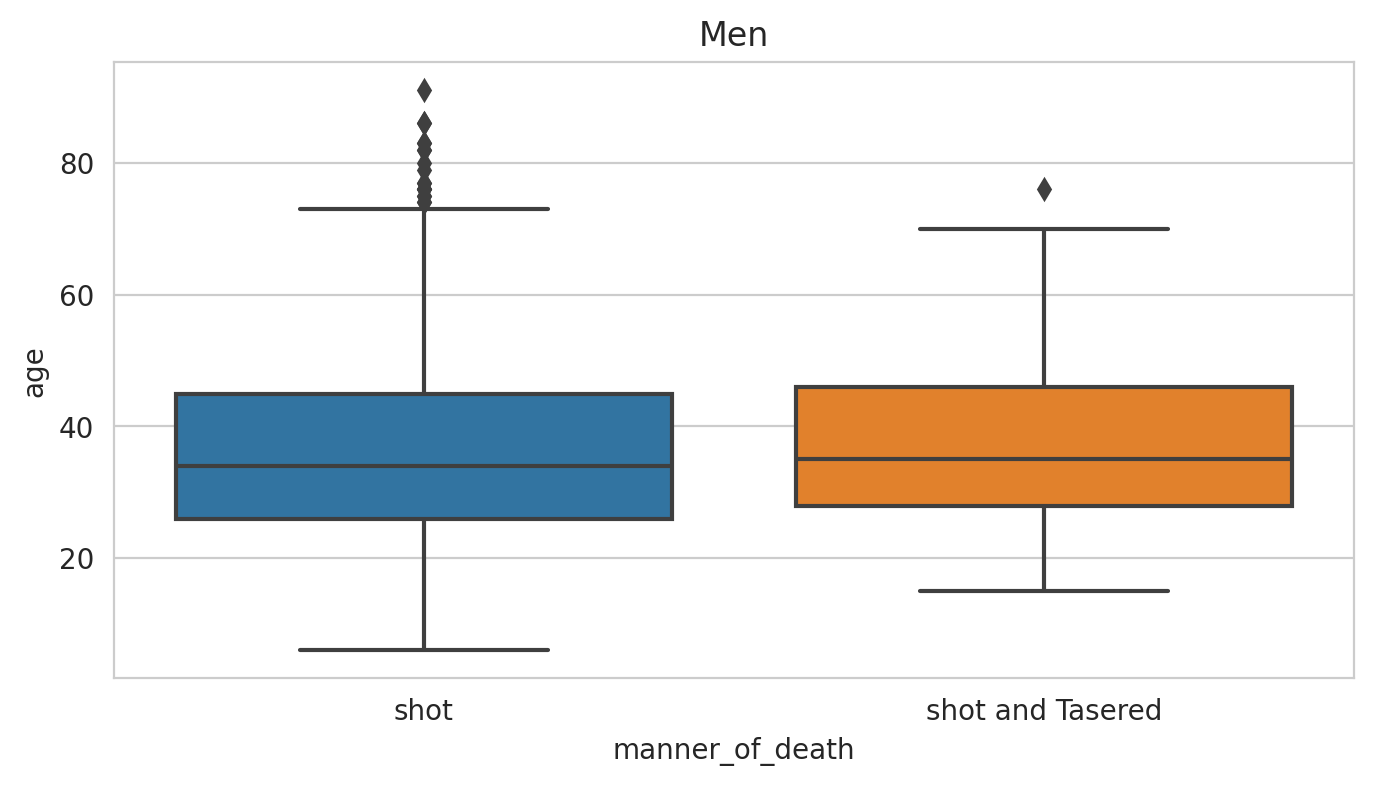

In [43]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.boxplot(data=men_df,
                x='manner_of_death',
                y='age',).set(title='Men')
    
    
plt.show()

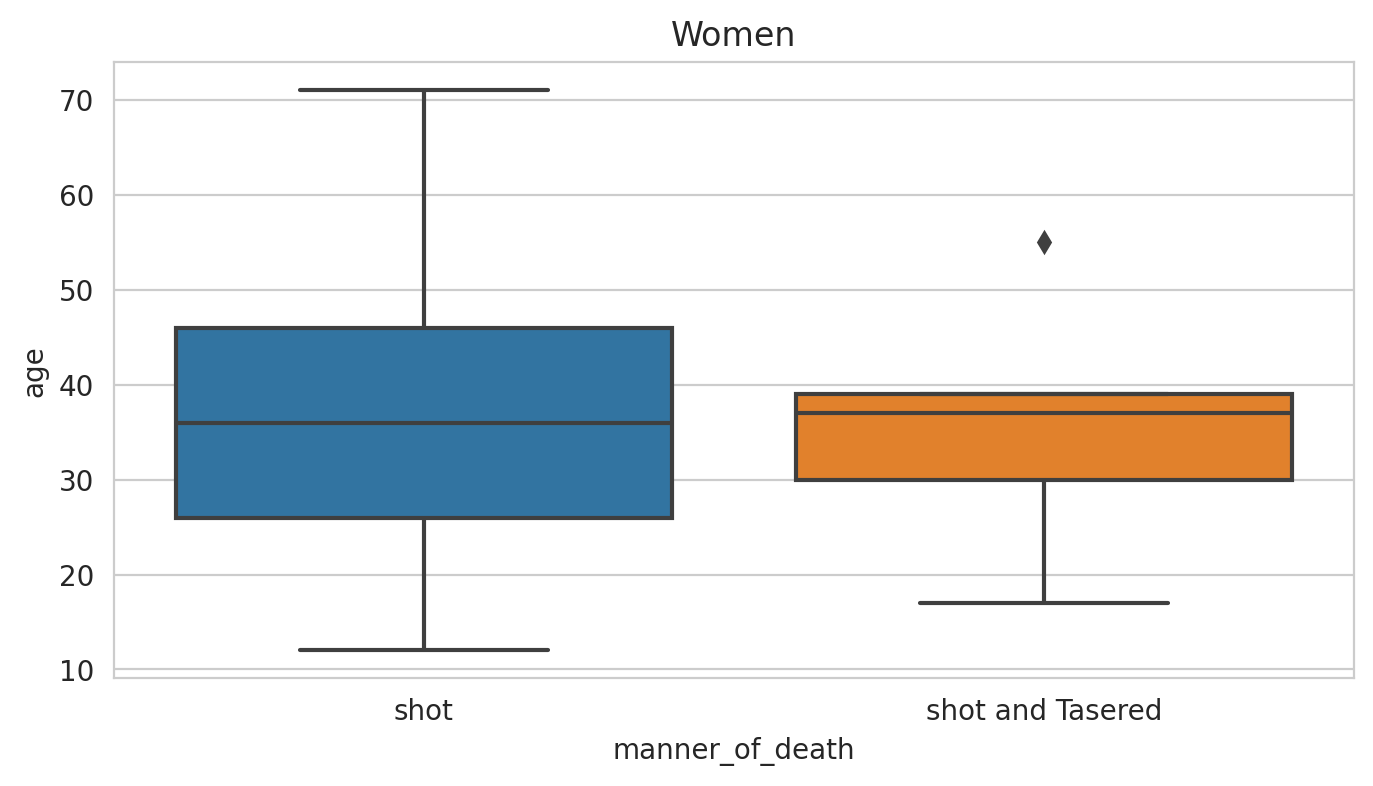

In [44]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.boxplot(data=women_df,
                x='manner_of_death',
                y='age',).set(title='Women')
    
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [45]:
df_fatalities.head(3)

id                name      date   manner_of_death    armed   age gender  \
0   3          Tim Elliot  02/01/15              shot      gun 53.00      M   
1   4    Lewis Lee Lembke  02/01/15              shot      gun 47.00      M   
2   5  John Paul Quintero  03/01/15  shot and Tasered  unarmed 23.00      M   

  race     city state  signs_of_mental_illness threat_level         flee  \
0    A  Shelton    WA                     True       attack  Not fleeing   
1    W    Aloha    OR                    False       attack  Not fleeing   
2    H  Wichita    KS                    False        other  Not fleeing   

   body_camera  
0        False  
1        False  
2        False

In [46]:
df_fatalities.armed.value_counts()

armed
gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: count, Length: 68, dtype: int64

In [47]:
undetermined = df_fatalities.loc[df_fatalities['armed'] == 'undetermined'].index

In [48]:
armed_df = df_fatalities.drop(undetermined)

In [49]:
armed_df.armed.value_counts()

armed
gun            1398
knife           373
vehicle         177
unarmed         171
toy weapon      104
               ... 
hand torch        1
garden tool       1
pole              1
pick-axe          1
pen               1
Name: count, Length: 67, dtype: int64

In [50]:
armed_value_sr = armed_df.armed.value_counts()
fig = px.pie(labels=armed_value_sr.index,
             values=armed_value_sr.values,
             title='Percentage of people armed and weapon used',
             names=armed_value_sr.index,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15,
                  textinfo='percent')

fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [51]:
under_25 = df_fatalities.loc[df_fatalities['age'] < 25]

In [52]:
under_25.age.value_counts()

age
24.00    83
23.00    71
22.00    57
18.00    54
21.00    52
19.00    41
20.00    41
17.00    23
16.00    16
15.00     8
6.00      1
12.00     1
14.00     1
13.00     1
Name: count, dtype: int64

In [53]:
under_25.age.value_counts().sum()

450

In [54]:
df_fatalities.age.value_counts().sum()

2458

In [55]:
print(f'People killed under 25: {format(under_25.age.value_counts().sum() / df_fatalities.age.value_counts().sum() * 100, ".2f")}%')

People killed under 25: 18.31%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [56]:
age_value_sr = df_fatalities.age.value_counts()

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



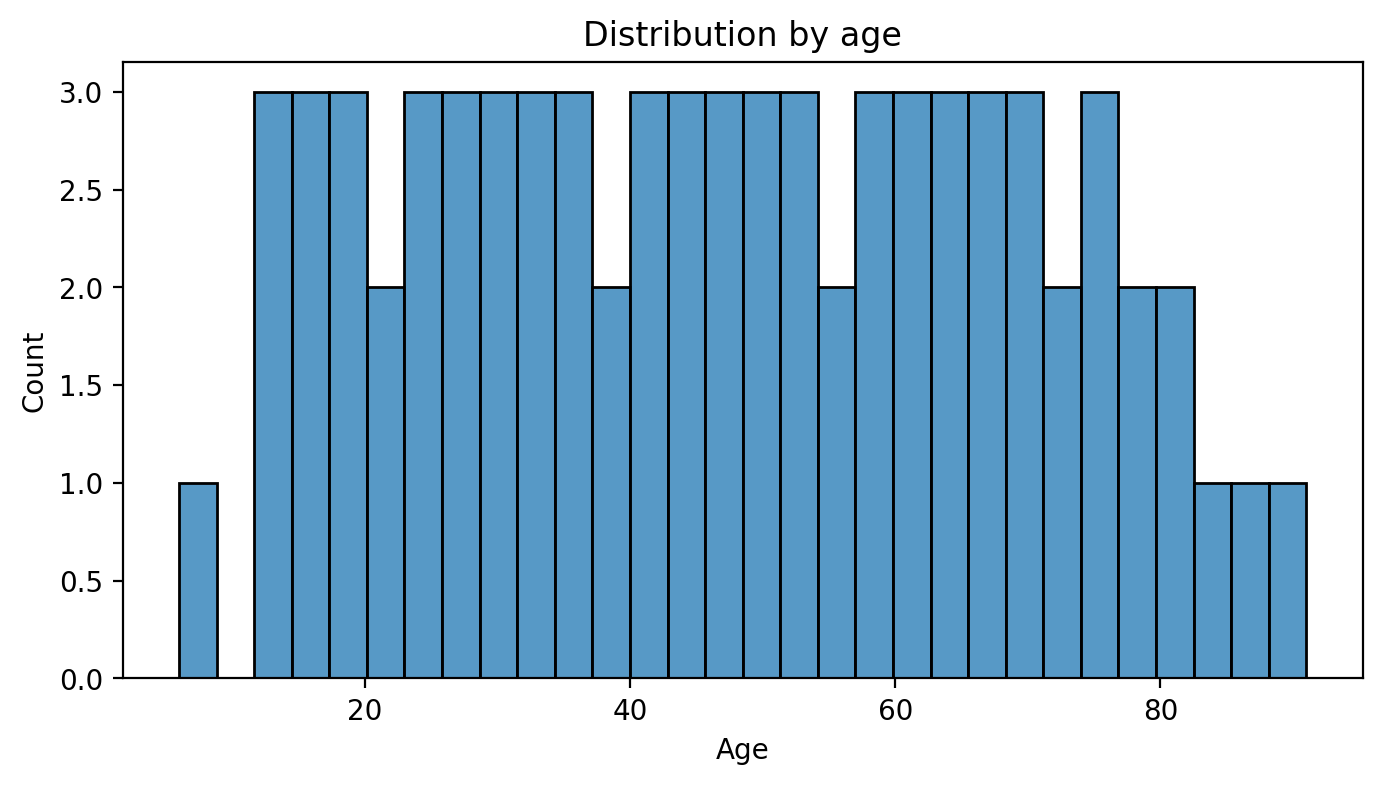

In [57]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=age_value_sr,
             x=age_value_sr.index,
             bins=30)

plt.xlabel('Age')
plt.title('Distribution by age')

plt.show()

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



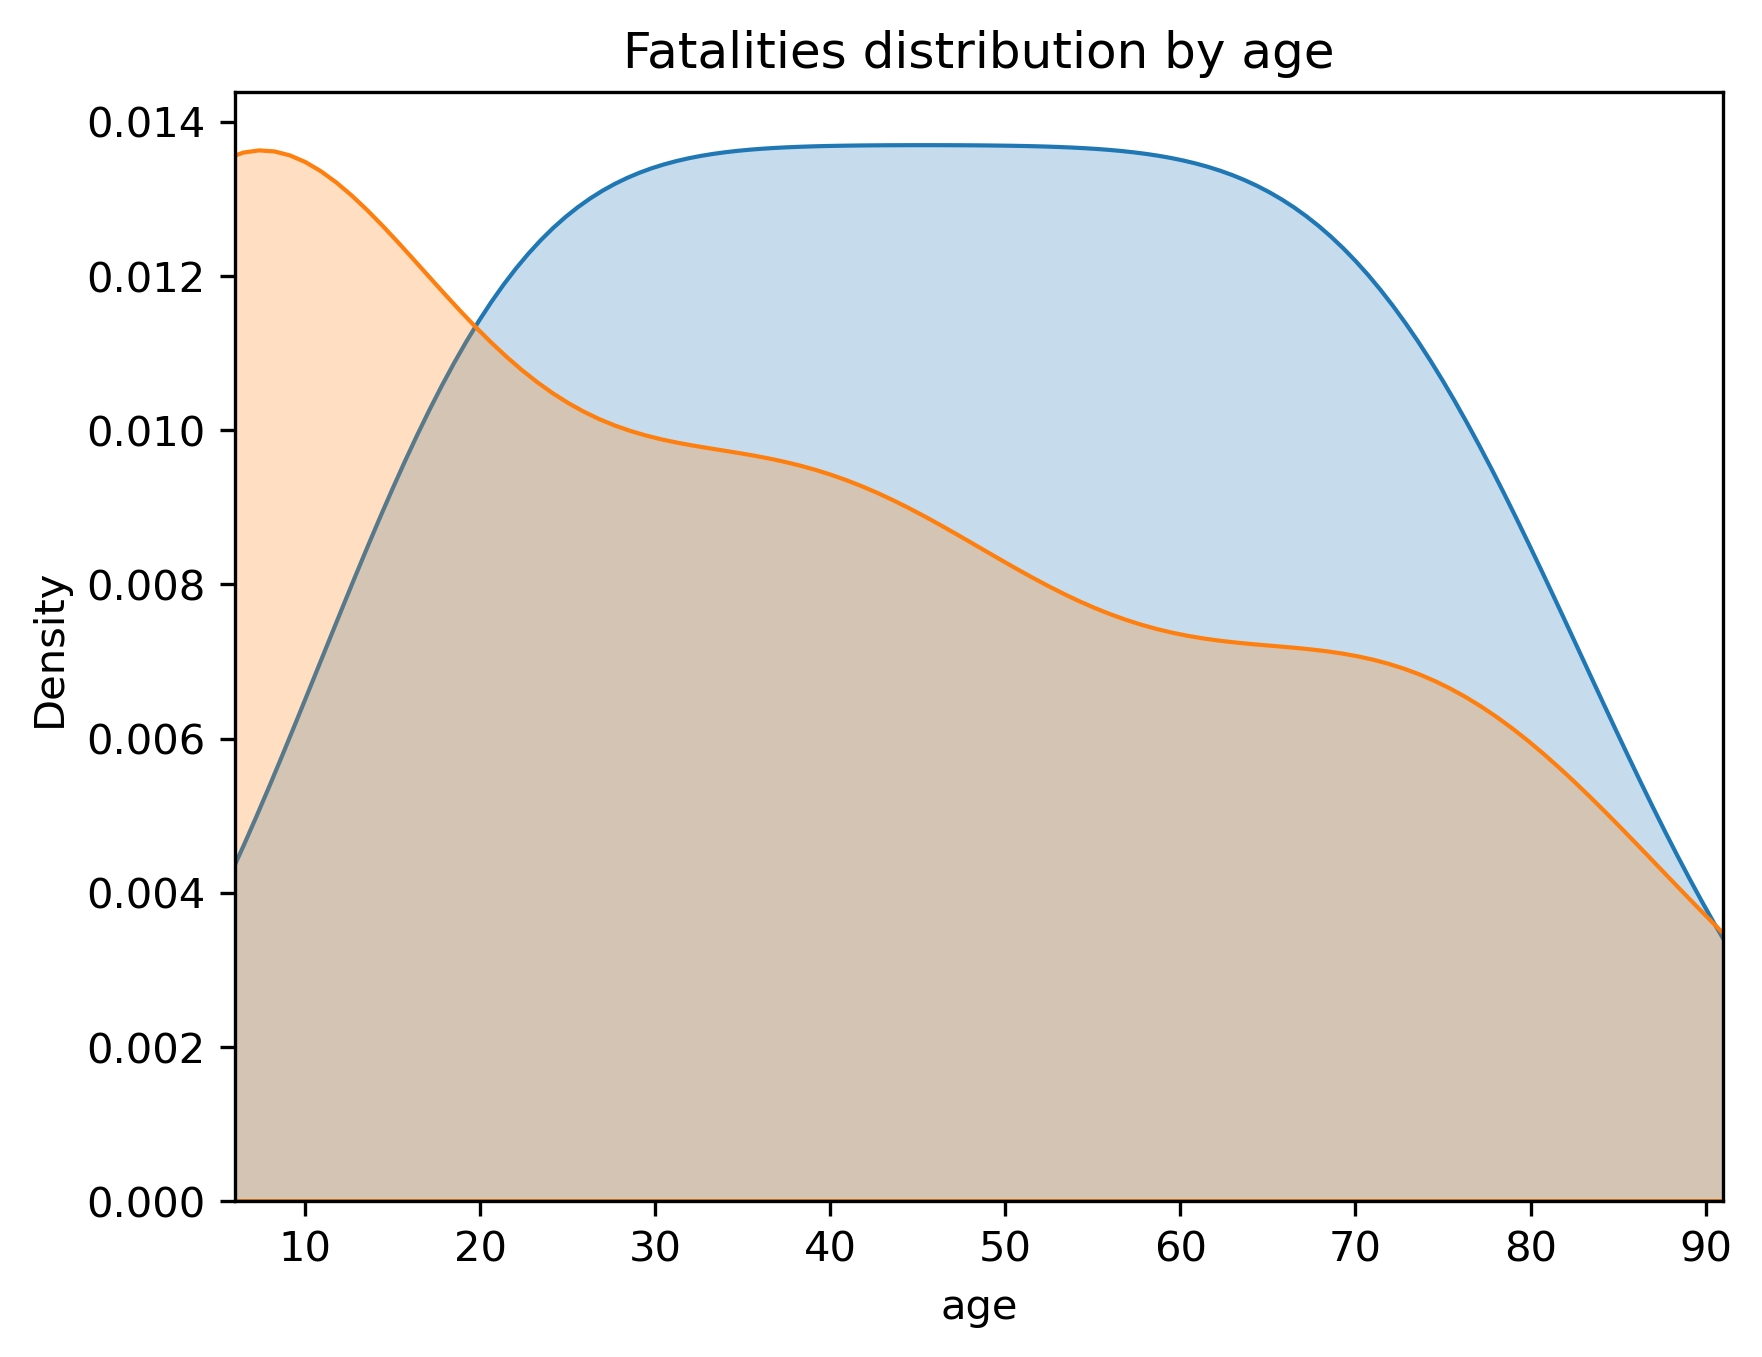

In [58]:


plt.figure(dpi=300)
sns.kdeplot(age_value_sr.index, 
            fill=True,)
sns.kdeplot(age_value_sr.values, 
            fill=True,)
plt.title('Fatalities distribution by age')
plt.xlim(age_value_sr.index.min(), age_value_sr.index.max())
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [59]:
df_fatalities.race.value_counts()

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



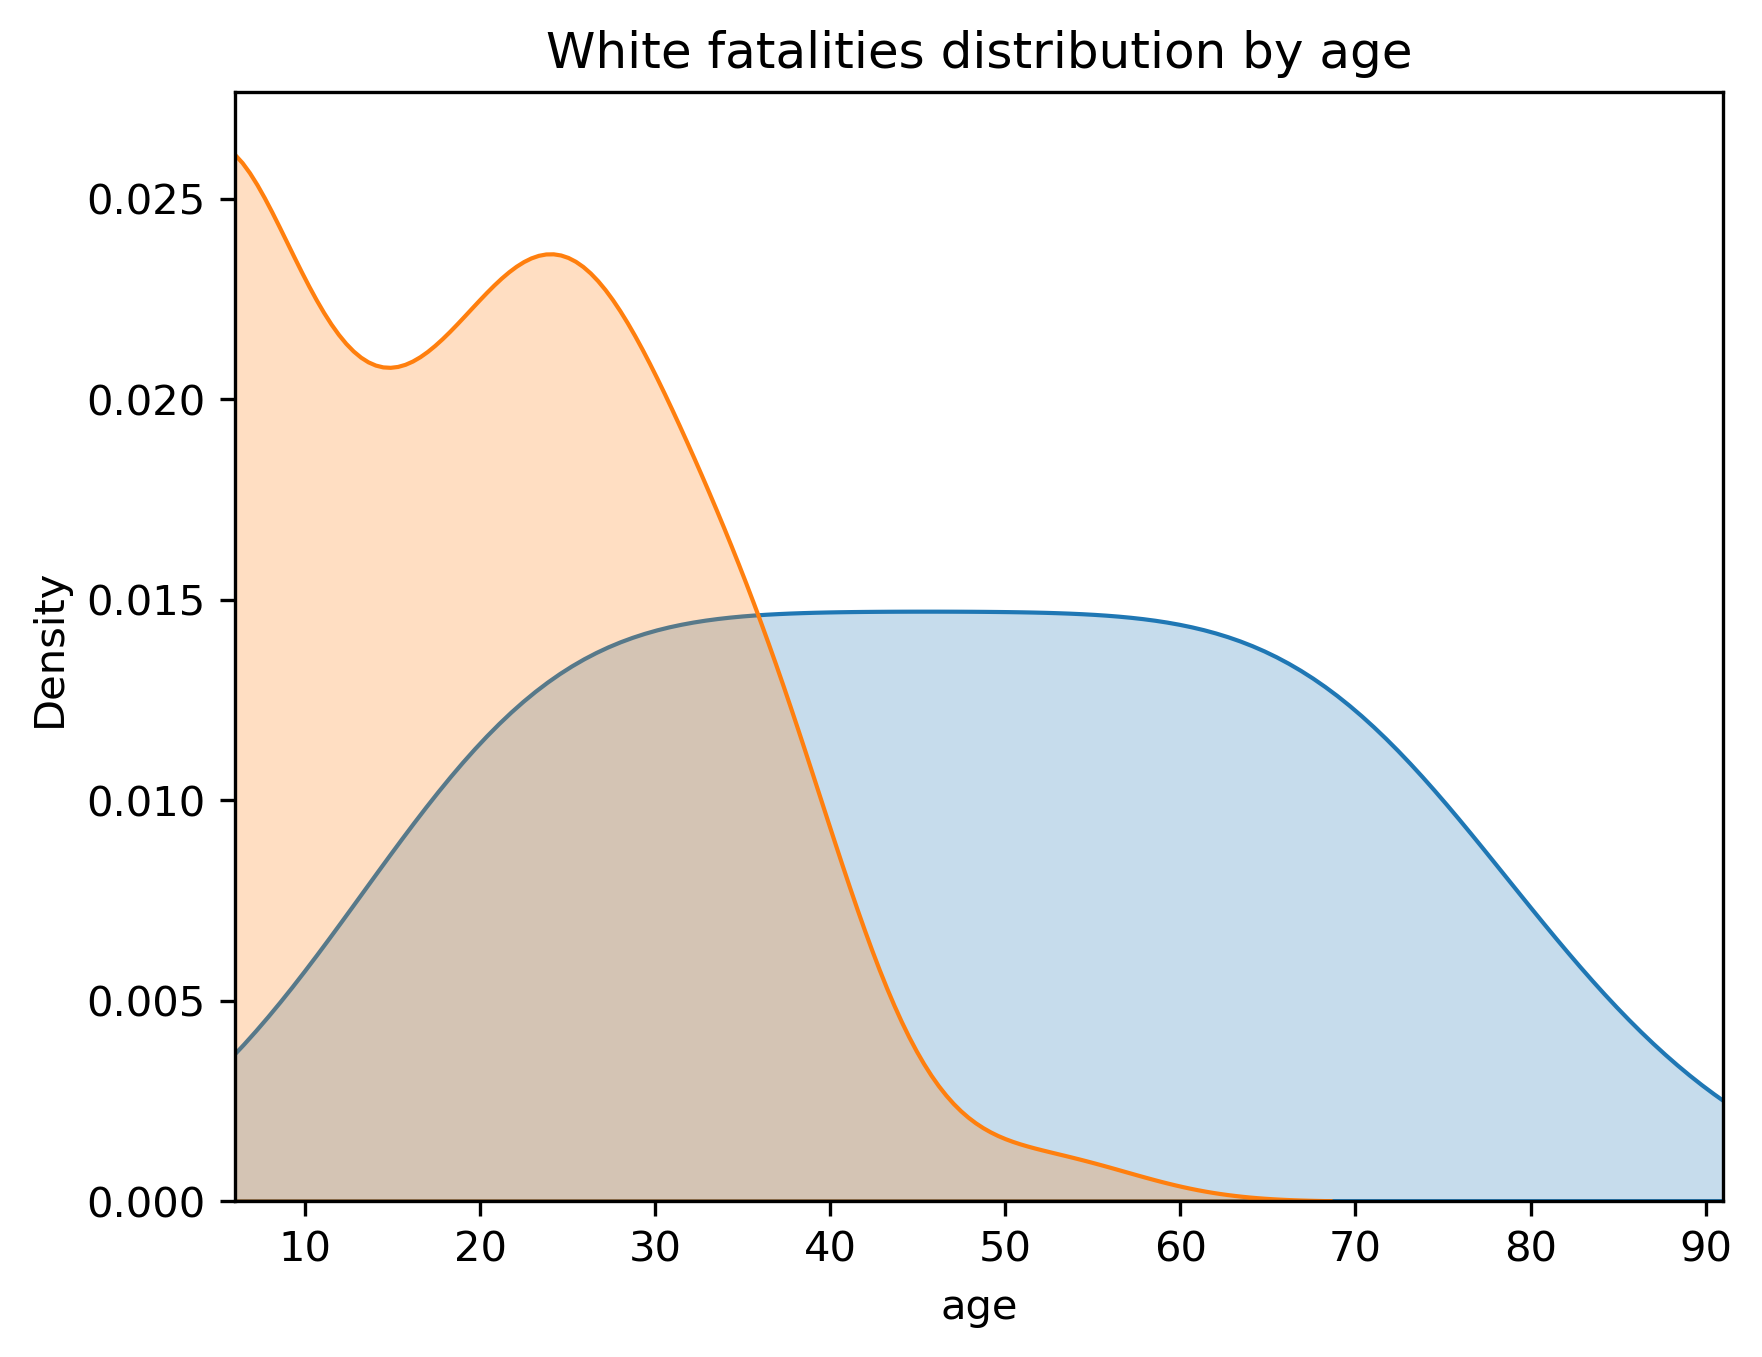

In [60]:
age_w_value_sr = df_fatalities.loc[df_fatalities['race'] == 'W'].age.value_counts()

plt.figure(dpi=300)
sns.kdeplot(age_w_value_sr.index, 
            fill=True,)
sns.kdeplot(age_w_value_sr.values, 
            fill=True,)
plt.title('White fatalities distribution by age')
plt.xlim(age_w_value_sr.index.min(), age_w_value_sr.index.max())
plt.show()

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



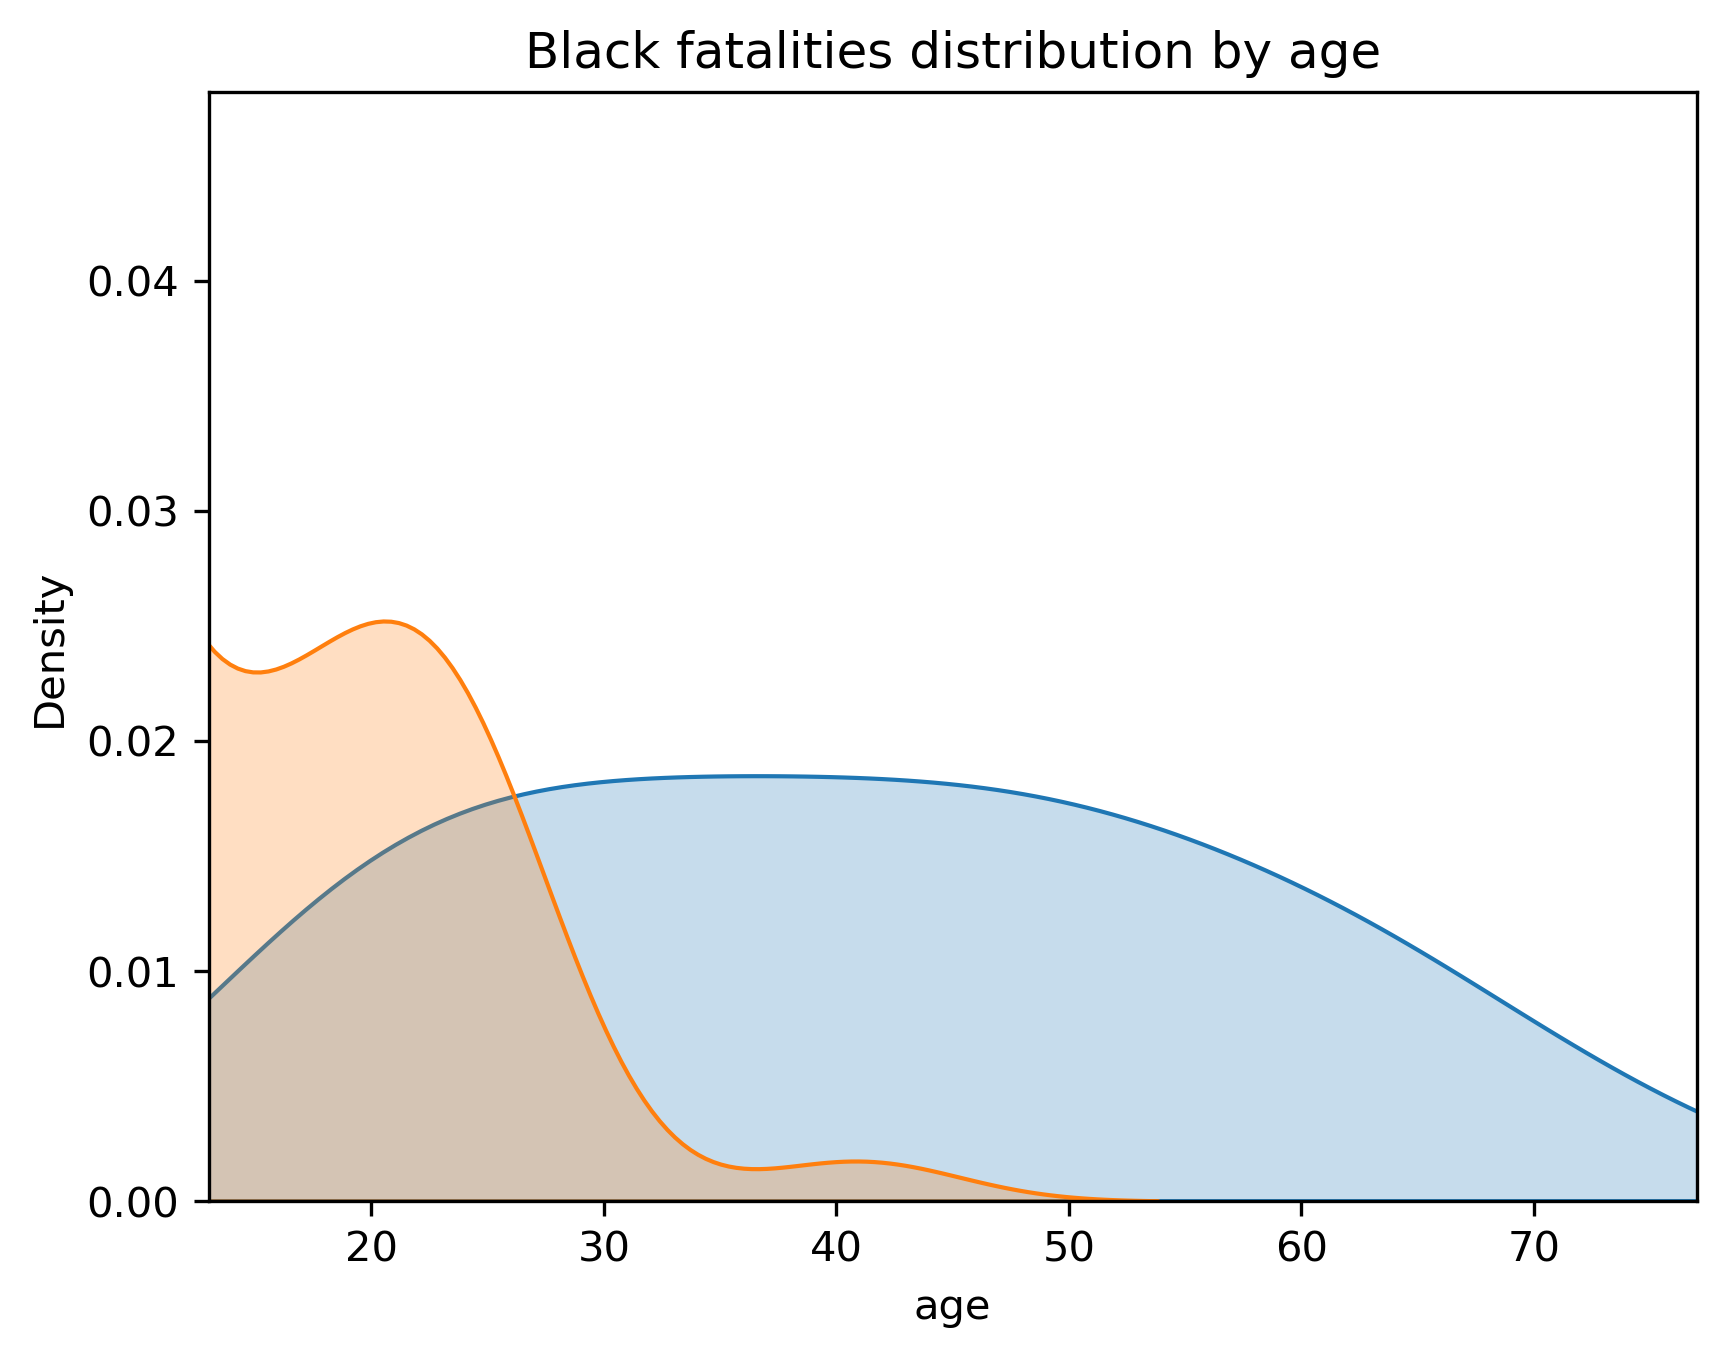

In [61]:
age_b_value_sr = df_fatalities.loc[df_fatalities['race'] == 'B'].age.value_counts()

plt.figure(dpi=300)
sns.kdeplot(age_b_value_sr.index, 
            fill=True,)
sns.kdeplot(age_b_value_sr.values, 
            fill=True,)
plt.title('Black fatalities distribution by age')
plt.xlim(age_b_value_sr.index.min(), age_b_value_sr.index.max())
plt.show()

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



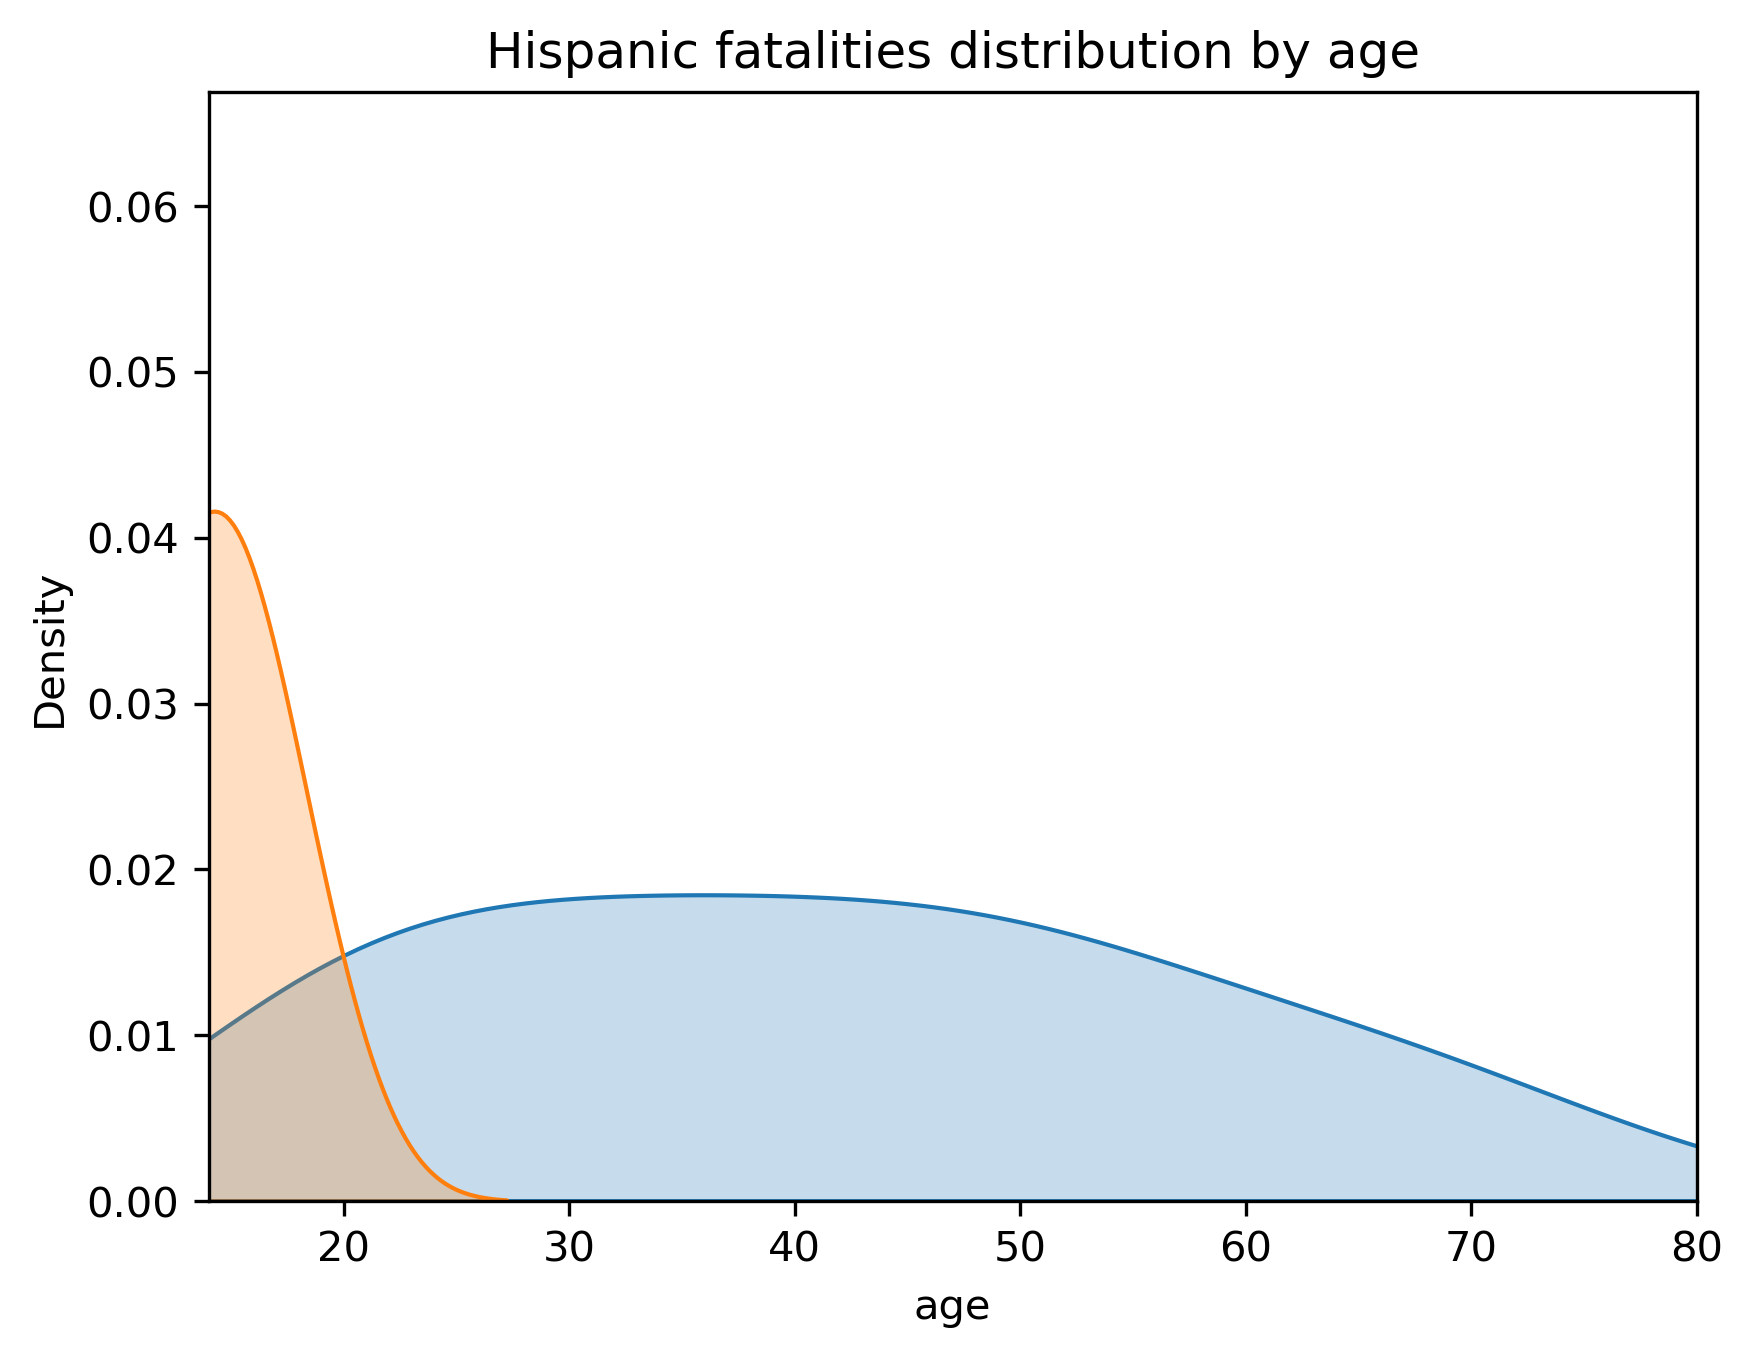

In [62]:
age_h_value_sr = df_fatalities.loc[df_fatalities['race'] == 'H'].age.value_counts()

plt.figure(dpi=300)
sns.kdeplot(age_h_value_sr.index, 
            fill=True,)
sns.kdeplot(age_h_value_sr.values, 
            fill=True,)
plt.title('Hispanic fatalities distribution by age')
plt.xlim(age_h_value_sr.index.min(), age_h_value_sr.index.max())
plt.show()

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



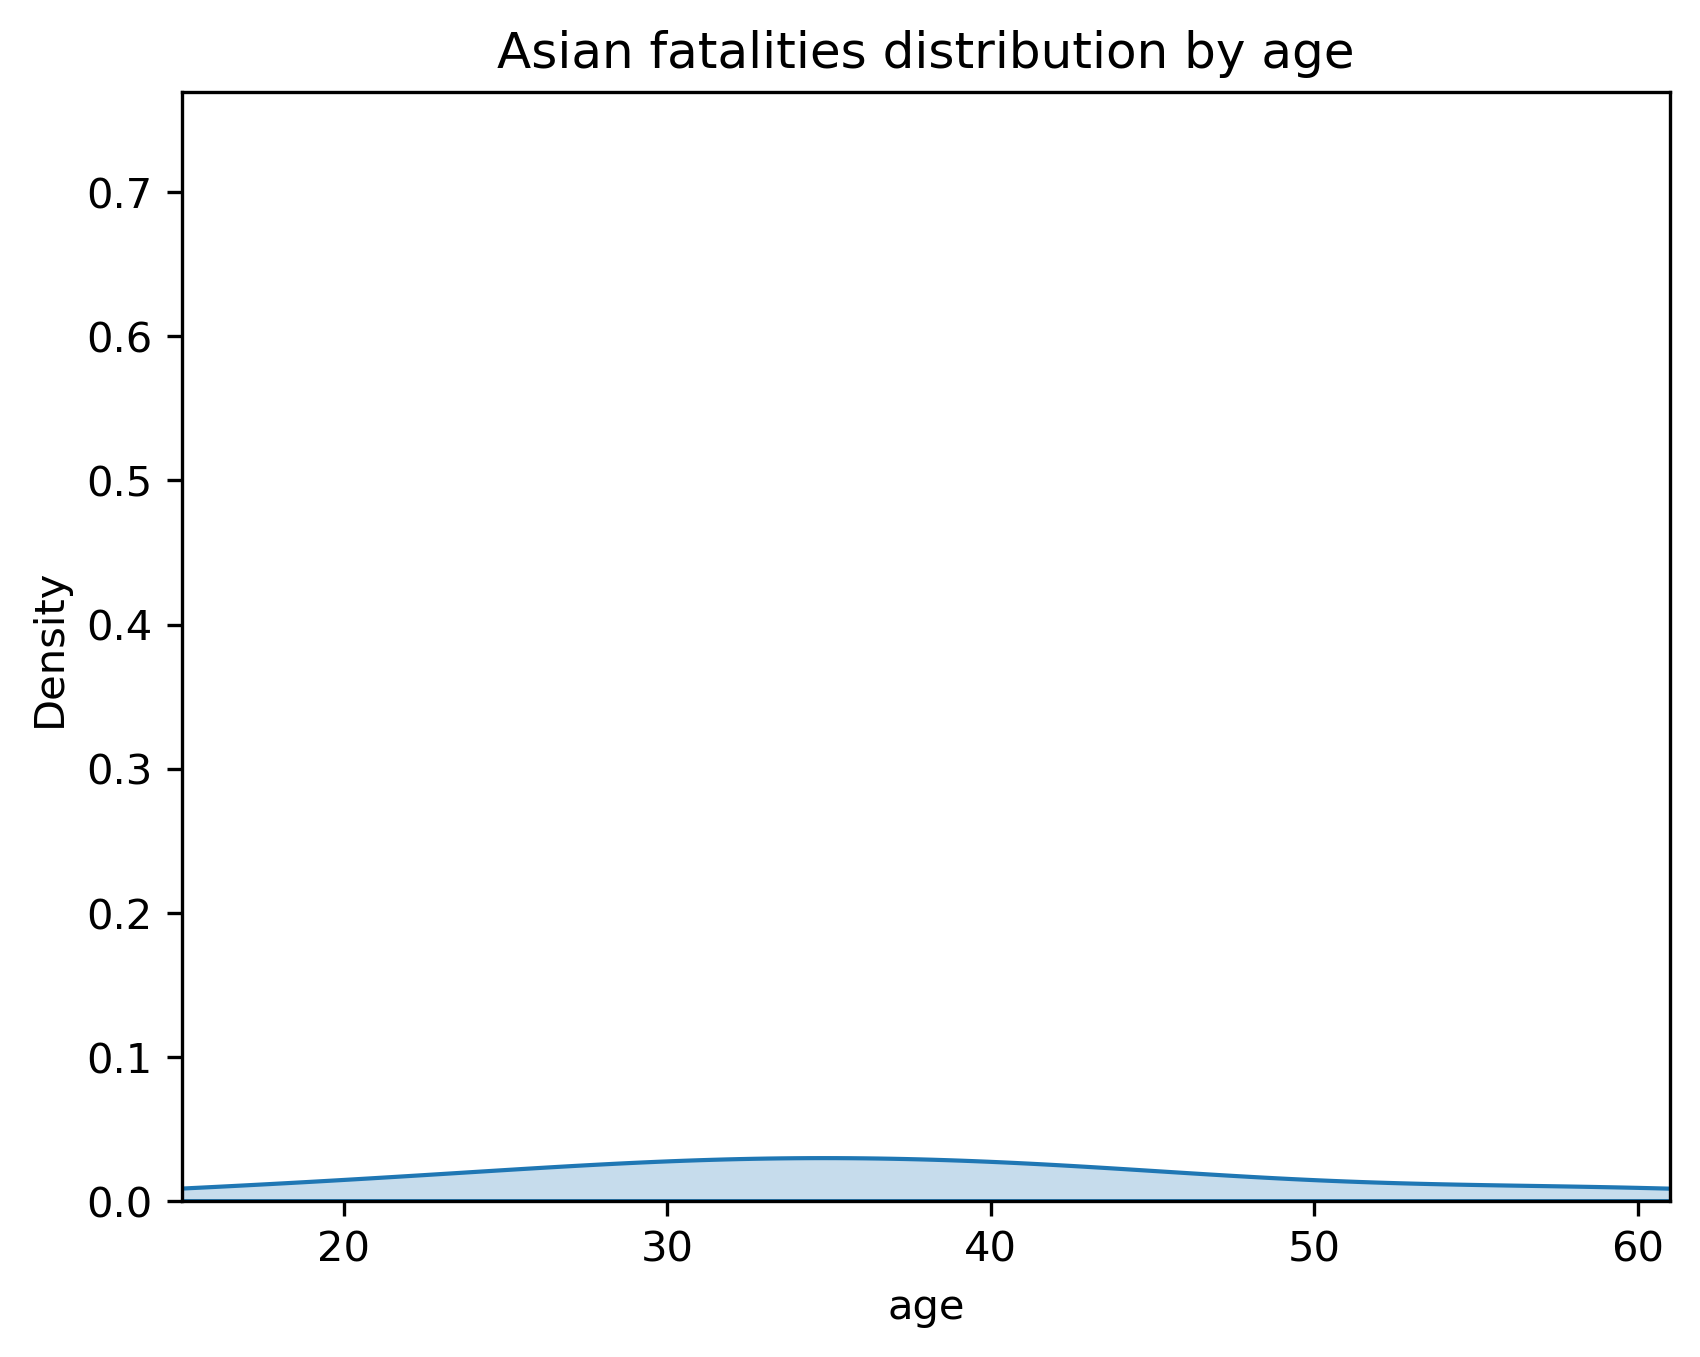

In [63]:
age_a_value_sr = df_fatalities.loc[df_fatalities['race'] == 'A'].age.value_counts()

plt.figure(dpi=300)
sns.kdeplot(age_a_value_sr.index, 
            fill=True,)
sns.kdeplot(age_a_value_sr.values, 
            fill=True,)
plt.title('Asian fatalities distribution by age')
plt.xlim(age_a_value_sr.index.min(), age_a_value_sr.index.max())
plt.show()

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



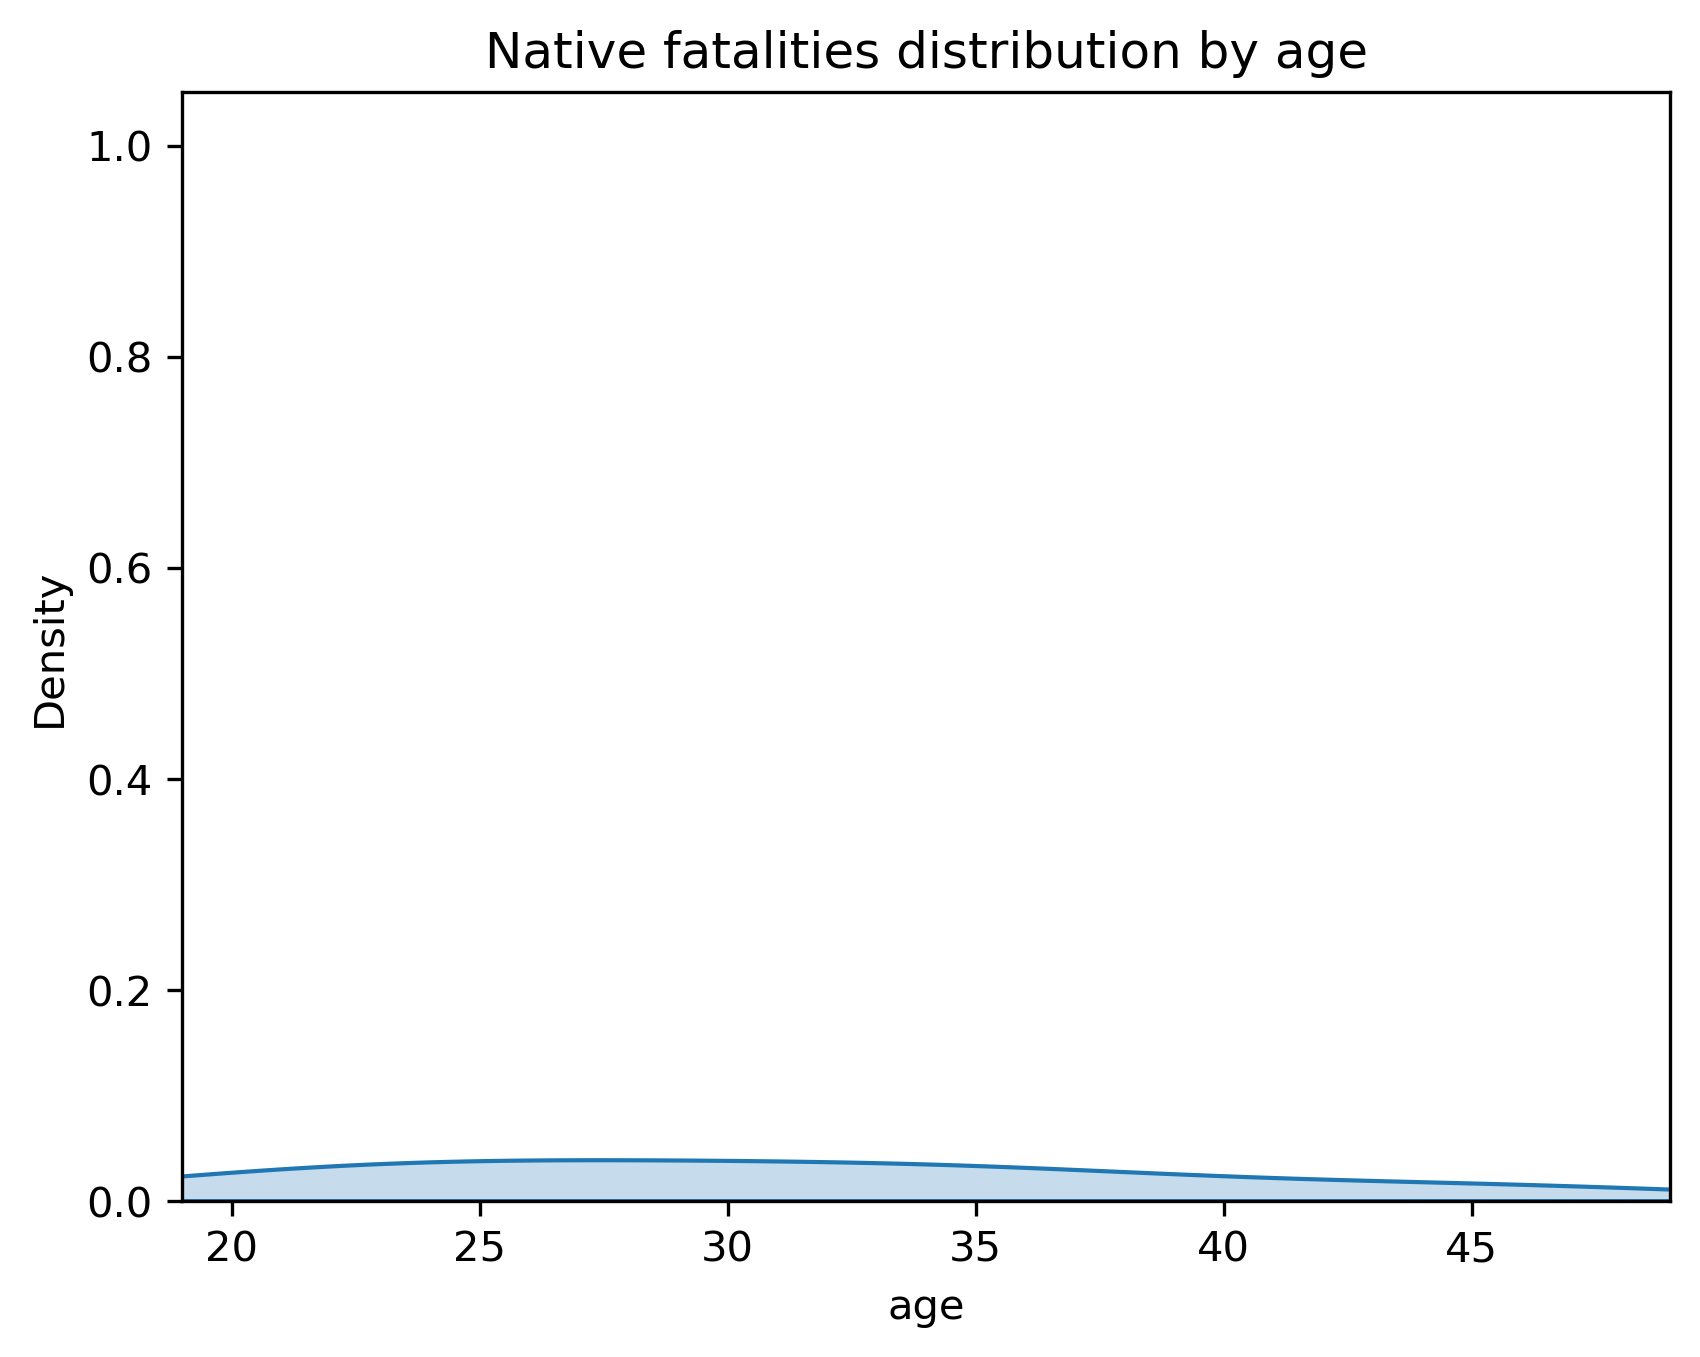

In [64]:
age_n_value_sr = df_fatalities.loc[df_fatalities['race'] == 'N'].age.value_counts()

plt.figure(dpi=300)
sns.kdeplot(age_n_value_sr.index, 
            fill=True,)
sns.kdeplot(age_n_value_sr.values, 
            fill=True,)
plt.title('Native fatalities distribution by age')
plt.xlim(age_n_value_sr.index.min(), age_n_value_sr.index.max())
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [65]:
race_value_sr = df_fatalities.race.value_counts()
fig = px.pie(labels=race_value_sr.index,
             values=race_value_sr.values,
             title='Percentage of people killed by race',
             names=race_value_sr.index,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15,
                  textinfo='value + percent')

fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [66]:
df_fatalities.head(3)

id                name      date   manner_of_death    armed   age gender  \
0   3          Tim Elliot  02/01/15              shot      gun 53.00      M   
1   4    Lewis Lee Lembke  02/01/15              shot      gun 47.00      M   
2   5  John Paul Quintero  03/01/15  shot and Tasered  unarmed 23.00      M   

  race     city state  signs_of_mental_illness threat_level         flee  \
0    A  Shelton    WA                     True       attack  Not fleeing   
1    W    Aloha    OR                    False       attack  Not fleeing   
2    H  Wichita    KS                    False        other  Not fleeing   

   body_camera  
0        False  
1        False  
2        False

In [67]:
df_fatalities.signs_of_mental_illness.value_counts()

signs_of_mental_illness
False    1902
True      633
Name: count, dtype: int64

In [68]:
mi_value_sr = df_fatalities.signs_of_mental_illness.value_counts()

new_indices_names = ['No', 'Yes']

mi_value_sr.index = new_indices_names

fig = px.pie(labels=mi_value_sr.index,
             values=mi_value_sr.values,
             title='Percentage of people killed with diagnosed mental illness',
             names=mi_value_sr.index,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15,
                  textinfo='percent')

fig.show()

In [69]:
mi_value_sr

No     1902
Yes     633
Name: count, dtype: int64

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [70]:
df_fatalities.head(3)

id                name      date   manner_of_death    armed   age gender  \
0   3          Tim Elliot  02/01/15              shot      gun 53.00      M   
1   4    Lewis Lee Lembke  02/01/15              shot      gun 47.00      M   
2   5  John Paul Quintero  03/01/15  shot and Tasered  unarmed 23.00      M   

  race     city state  signs_of_mental_illness threat_level         flee  \
0    A  Shelton    WA                     True       attack  Not fleeing   
1    W    Aloha    OR                    False       attack  Not fleeing   
2    H  Wichita    KS                    False        other  Not fleeing   

   body_camera  
0        False  
1        False  
2        False

In [71]:
city_value_sr = df_fatalities.city.value_counts()[:10]

fig = px.pie(labels=city_value_sr.index,
             values=city_value_sr.values,
             title='Percentage of people killed by city',
             names=city_value_sr.index,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15,
                  textinfo='percent')

fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [72]:
cities = df_fatalities.city.value_counts()[:10].index

city_race_df = df_fatalities.loc[df_fatalities['city'].isin(cities)][['city', 'race']]

In [73]:
# city_race_df.set_index('city', inplace=True)

In [74]:
# city_race_df.drop('count', axis=1, inplace=True)

In [75]:
city_race_df.dropna(inplace=True)

In [76]:
city_race_df

city race
12       Columbus    B
40    Los Angeles    H
48      St. Louis    B
52         Austin    W
64        Phoenix    N
...           ...  ...
2427      Phoenix    H
2434      Phoenix    W
2500  San Antonio    H
2508    St. Louis    B
2515    St. Louis    W

[216 rows x 2 columns]

In [77]:
new_df = city_race_df.groupby(['city', 'race'])['race'].value_counts().reset_index()

In [78]:
new_df

city race  count
0        Austin    B      3
1        Austin    H      2
2        Austin    W     13
3       Chicago    B     21
4       Chicago    H      1
5       Chicago    W      2
6      Columbus    B     11
7      Columbus    O      1
8      Columbus    W      6
9       Houston    A      1
10      Houston    B     15
11      Houston    H      6
12      Houston    N      1
13      Houston    W      3
14    Las Vegas    B      3
15    Las Vegas    H      5
16    Las Vegas    W      9
17  Los Angeles    A      1
18  Los Angeles    B     10
19  Los Angeles    H     19
20  Los Angeles    W      6
21        Miami    B      8
22        Miami    H      6
23        Miami    W      3
24      Phoenix    B      2
25      Phoenix    H     11
26      Phoenix    N      3
27      Phoenix    W     12
28  San Antonio    B      3
29  San Antonio    H     12
30  San Antonio    W      3
31    St. Louis    B     11
32    St. Louis    W      3

In [79]:
pivoted_df = new_df.pivot(index='city', columns='race', values='count')

In [80]:
pivoted_df.fillna(0, inplace=True)

In [81]:
pivoted_df

race           A     B     H    N    O     W
city                                        
Austin      0.00  3.00  2.00 0.00 0.00 13.00
Chicago     0.00 21.00  1.00 0.00 0.00  2.00
Columbus    0.00 11.00  0.00 0.00 1.00  6.00
Houston     1.00 15.00  6.00 1.00 0.00  3.00
Las Vegas   0.00  3.00  5.00 0.00 0.00  9.00
Los Angeles 1.00 10.00 19.00 0.00 0.00  6.00
Miami       0.00  8.00  6.00 0.00 0.00  3.00
Phoenix     0.00  2.00 11.00 3.00 0.00 12.00
San Antonio 0.00  3.00 12.00 0.00 0.00  3.00
St. Louis   0.00 11.00  0.00 0.00 0.00  3.00

In [82]:
fig = px.bar(pivoted_df)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [83]:
df_fatalities.head(3)

id                name      date   manner_of_death    armed   age gender  \
0   3          Tim Elliot  02/01/15              shot      gun 53.00      M   
1   4    Lewis Lee Lembke  02/01/15              shot      gun 47.00      M   
2   5  John Paul Quintero  03/01/15  shot and Tasered  unarmed 23.00      M   

  race     city state  signs_of_mental_illness threat_level         flee  \
0    A  Shelton    WA                     True       attack  Not fleeing   
1    W    Aloha    OR                    False       attack  Not fleeing   
2    H  Wichita    KS                    False        other  Not fleeing   

   body_camera  
0        False  
1        False  
2        False

In [84]:
state_value_sr = df_fatalities.state.value_counts()

fig = px.choropleth(state_value_sr,
                    locations=state_value_sr.index,
                    color=state_value_sr.values,
                    color_continuous_scale='spectral_r',
                    hover_name=state_value_sr.index,
                    locationmode='USA-states',
                    labels={'':''},
                    scope='usa')
fig.show(0)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [85]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

C:\Users\wsr\AppData\Local\Temp\ipykernel_17876\1103991209.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [86]:
over_time_df = df_fatalities.date.value_counts().reset_index()

In [87]:
over_time_df

date  count
0   2017-01-24      8
1   2016-12-21      8
2   2015-07-07      8
3   2016-01-27      8
4   2017-10-02      8
..         ...    ...
874 2017-08-01      1
875 2015-12-16      1
876 2017-01-13      1
877 2015-12-15      1
878 2015-10-27      1

[879 rows x 2 columns]

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\wsr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



(array([16436., 16556., 16679., 16801., 16922., 17045., 17167., 17287.,
        17410., 17532.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16556.0, 0, '2015-05'),
  Text(16679.0, 0, '2015-09'),
  Text(16801.0, 0, '2016-01'),
  Text(16922.0, 0, '2016-05'),
  Text(17045.0, 0, '2016-09'),
  Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01')])

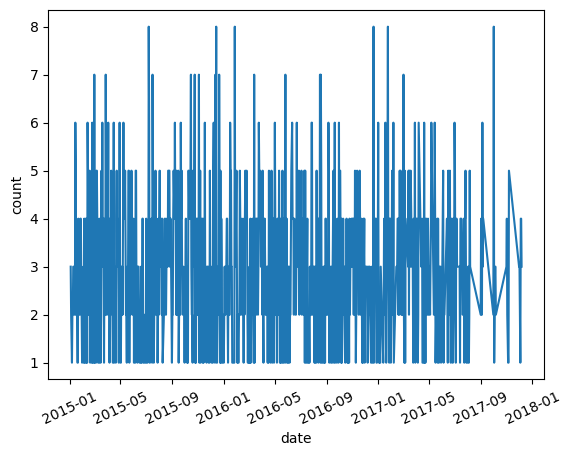

In [88]:
sns.lineplot(x = "date", y = "count", 
             data = over_time_df) 
  
plt.xticks(rotation = 25)

In [89]:
over_time_df['year'] = over_time_df.date.dt.year

In [90]:
per_year = over_time_df.groupby('year')['count'].sum()

In [91]:
per_year

year
2015    991
2016    963
2017    581
Name: count, dtype: int64

In [92]:
px.bar(per_year)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).